# Support Vector Machine
A support vector machine takes these data points and outputs the hyperplane that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red. For SVM, a hyperplane is the plane (which in two dimensions it’s simply a line) that maximizes the margins from both tags.<br>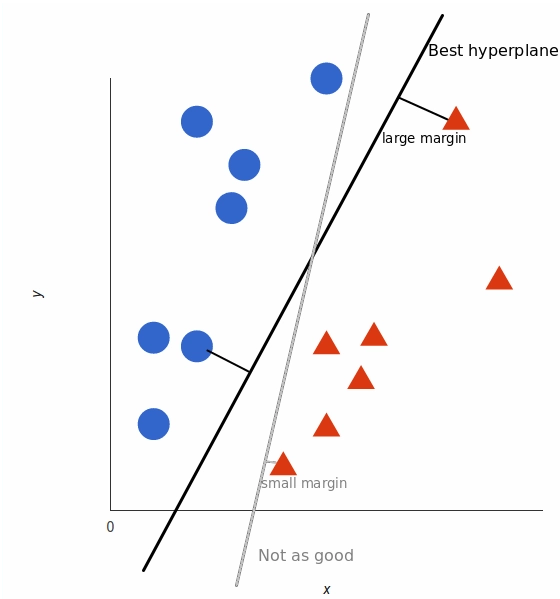

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = data.iloc[:,1:2].values.astype(float)
y = data.iloc[:,2:3].values.astype(float)

print(x)
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


## Feature Scaling

In [5]:
scale_x = StandardScaler()
scale_y = StandardScaler()

x = scale_x.fit_transform(x)
y = scale_y.fit_transform(y)

## Plot

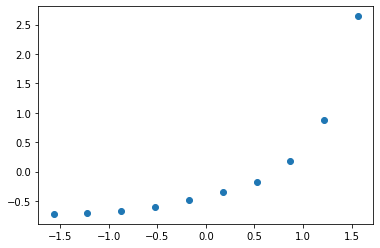

In [6]:
plt.scatter(x, y)
plt.show()

## Train

In [7]:
model = SVR(kernel='rbf')
model.fit(x,y)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Plot

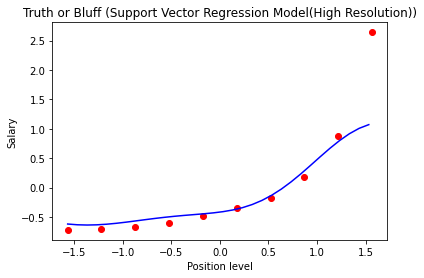

In [8]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = "red")
plt.plot(x_grid, model.predict(x_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Prediction

In [14]:
y_pred = model.predict(scale_x.transform(np.array([[10]])))
y_pred = scale_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred

array([[557821.75899897]])

## Comparing with polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

PolynomialFeatures(degree=3)

In [16]:
from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(x_poly,y)

LinearRegression()

Text(0, 0.5, 'Brain Weight')

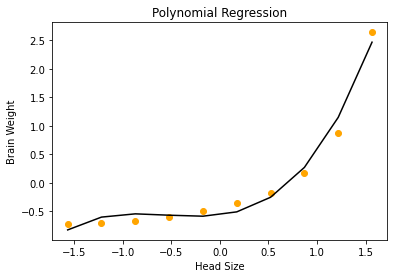

In [17]:
plt.scatter(x, y, color = 'orange')
plt.plot(x,polymodel.predict(poly.fit_transform(x)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')